In [8]:
import os, yaml, sys
import numpy as np
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from general_utils.utils import BrainAreas, RSA, load_img_natraster, print_wise
from general_utils.dRSA import across_areas_dRSA
from general_utils.II import InformationImbalance, compare_similarity_metrics

In [6]:
from dataclasses import dataclass, field

@dataclass
class Cfg:
    monkey_name: str = 'paul' 
    date: str = '230204'
    brain_area: str = 'AIT'
    new_fs: int = 100 # Hz
    RDM_metric_A: str = 'correlation'
    RDM_metric_B: str = 'cosine'
    k: int = 1
cfg = Cfg()

In [3]:
raster = load_img_natraster(paths, cfg.monkey_name, cfg.date, new_fs=cfg.new_fs)

In [4]:
ba_obj = BrainAreas(cfg.monkey_name)
ba_raster = ba_obj.slice_brain_area(raster, cfg.brain_area)

In [10]:
A2B_list = []
B2A_list = []
for idx, resp_t in enumerate(ba_raster):
    _, A2B, B2A =compare_similarity_metrics(resp_t, cfg.RDM_metric_A, cfg.RDM_metric_B, cfg.k)
    A2B_list.append(A2B)
    B2A_list.append(B2A)
    print_wise(f"computed {idx*1000/cfg.new_fs:.0f}ms. {A2B:.3f} {B2A:.3f} ")

17:15:52 - computed 0ms. 0.007 0.001 
17:15:56 - computed 10ms. 0.007 0.001 
17:15:59 - computed 20ms. 0.007 0.001 
17:16:02 - computed 30ms. 0.005 0.001 
17:16:05 - computed 40ms. 0.005 0.001 
17:16:09 - computed 50ms. 0.013 0.001 
17:16:12 - computed 60ms. 0.025 0.001 
17:16:15 - computed 70ms. 0.058 0.002 
17:16:19 - computed 80ms. 0.091 0.002 
17:16:22 - computed 90ms. 0.102 0.002 
17:16:25 - computed 100ms. 0.096 0.002 
17:16:29 - computed 110ms. 0.093 0.001 
17:16:32 - computed 120ms. 0.089 0.001 
17:16:35 - computed 130ms. 0.087 0.001 
17:16:38 - computed 140ms. 0.085 0.001 
17:16:41 - computed 150ms. 0.091 0.001 
17:16:45 - computed 160ms. 0.083 0.001 
17:16:48 - computed 170ms. 0.069 0.002 
17:16:51 - computed 180ms. 0.073 0.002 
17:16:54 - computed 190ms. 0.070 0.002 
17:16:57 - computed 200ms. 0.064 0.002 
17:17:01 - computed 210ms. 0.066 0.001 
17:17:04 - computed 220ms. 0.065 0.001 
17:17:07 - computed 230ms. 0.057 0.001 
17:17:10 - computed 240ms. 0.050 0.001 
17:17:13 - 

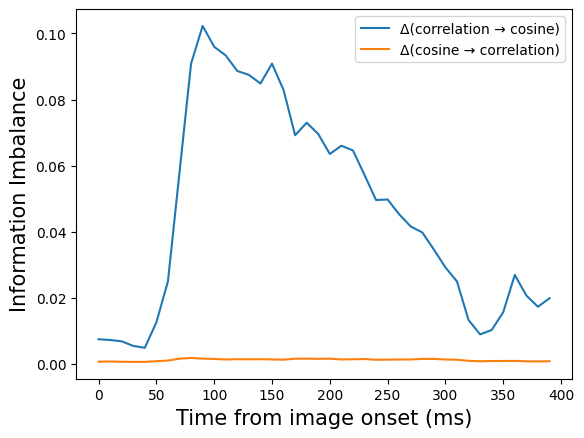

In [30]:
plt.plot(np.arange(0, len(A2B_list))*1000//cfg.new_fs,A2B_list, label=f"{chr(916)}({cfg.RDM_metric_A} {chr(8594)} {cfg.RDM_metric_B})")
plt.plot(np.arange(len(A2B_list))*1000//cfg.new_fs, B2A_list, label=f"{chr(916)}({cfg.RDM_metric_B} {chr(8594)} {cfg.RDM_metric_A})")
plt.ylabel("Information Imbalance", fontsize=15)
plt.xlabel("Time from image onset (ms)", fontsize=15)
plt.legend()